In [1]:
%pip install tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
#Dataset
%pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jonathanoheix/face-expression-recognition-dataset")

print("Path to dataset files:", path)


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Path to dataset files: C:\Users\Skynet\.cache\kagglehub\datasets\jonathanoheix\face-expression-recognition-dataset\versions\1


<h1 style="color: #ab5bb0">Ucitavanje podataka: - Originalni dataset</h1>

In [3]:
#Anja Lovric
# train_val_data_dir = r'..\images\train'
train_val_data_dir = path + r'\images\train'
img_height = 48
img_width = 48
batch_size = 128

# train DS
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_val_data_dir,
    labels='inferred',  # subfolderi - labele
    label_mode='categorical',   # labele - kao one hot encod
    validation_split=0.2, 
    subset = 'training',
    seed = 123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale'
    #interpolation='bilinear' # opciono - metod, kod nas ne radimo resizing
)

train_class_names = train_ds.class_names
print(train_class_names)  

# validation DS (20%)
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_val_data_dir,
    labels='inferred',
    label_mode='categorical',     
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale'
)

val_class_names = val_ds.class_names
print(val_class_names) 


# test DS
# test_data_dir = r'..\images\test'
test_data_dir = path + r'\images\validation'
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    labels='inferred',       
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=True
)

test_class_names = test_ds.class_names
print(test_class_names)


Found 28821 files belonging to 7 classes.
Using 23057 files for training.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Found 28821 files belonging to 7 classes.
Using 5764 files for validation.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Found 7066 files belonging to 7 classes.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [5]:
def count_labels_with_percentage(dataset, class_names):
    counts = dict.fromkeys(class_names, 0)
    total = 0
    
    for _, labels in dataset:
        indices = np.argmax(labels, axis=1)
        for i in indices:
            counts[class_names[i]] += 1
        total += len(indices)
    percentages = {cls: f"{(counts[cls]/total)*100:.2f}%" for cls in class_names}
    
    return counts, percentages


train_counts, train_perc = count_labels_with_percentage(train_ds, train_ds.class_names)
val_counts, val_perc = count_labels_with_percentage(val_ds, val_ds.class_names)
test_counts, test_perc = count_labels_with_percentage(test_ds, test_ds.class_names)

print("Train dataset counts:", train_counts)
print("Train dataset %:", train_perc)

print("\nValidation dataset counts:", val_counts)
print("Validation dataset %:", val_perc)

print("\nTest dataset counts:", test_counts)
print("Test dataset %:", test_perc)


Train dataset counts: {'angry': 3229, 'disgust': 341, 'fear': 3294, 'happy': 5765, 'neutral': 3941, 'sad': 3935, 'surprise': 2552}
Train dataset %: {'angry': '14.00%', 'disgust': '1.48%', 'fear': '14.29%', 'happy': '25.00%', 'neutral': '17.09%', 'sad': '17.07%', 'surprise': '11.07%'}

Validation dataset counts: {'angry': 764, 'disgust': 95, 'fear': 809, 'happy': 1399, 'neutral': 1041, 'sad': 1003, 'surprise': 653}
Validation dataset %: {'angry': '13.25%', 'disgust': '1.65%', 'fear': '14.04%', 'happy': '24.27%', 'neutral': '18.06%', 'sad': '17.40%', 'surprise': '11.33%'}

Test dataset counts: {'angry': 960, 'disgust': 111, 'fear': 1018, 'happy': 1825, 'neutral': 1216, 'sad': 1139, 'surprise': 797}
Test dataset %: {'angry': '13.59%', 'disgust': '1.57%', 'fear': '14.41%', 'happy': '25.83%', 'neutral': '17.21%', 'sad': '16.12%', 'surprise': '11.28%'}


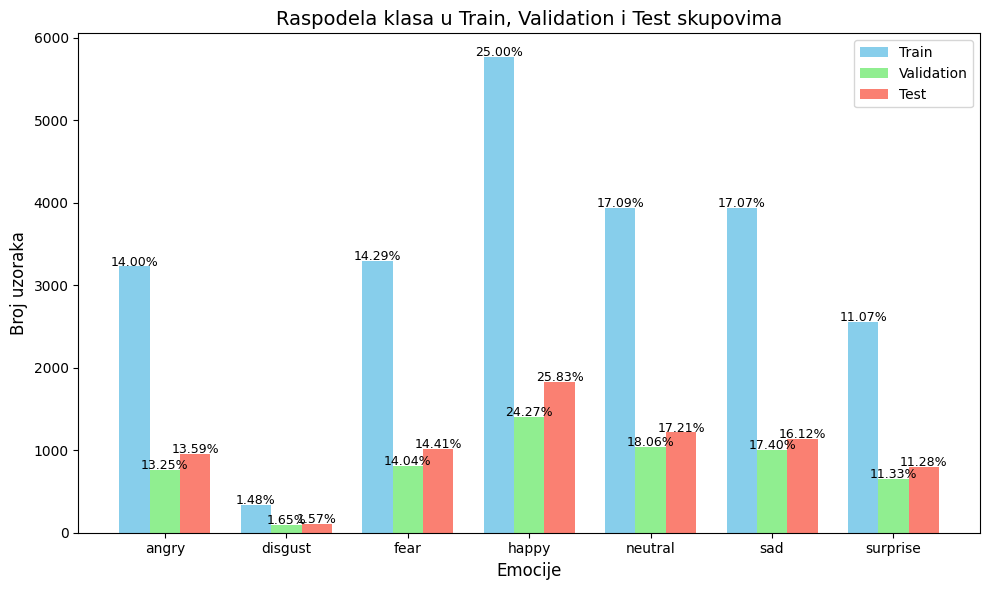

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

emotions = train_ds.class_names

train_values = [train_counts[cls] for cls in emotions]
val_values   = [val_counts[cls] for cls in emotions]
test_values  = [test_counts[cls] for cls in emotions]

train_perc_values = [train_perc[cls] for cls in emotions]
val_perc_values   = [val_perc[cls] for cls in emotions]
test_perc_values  = [test_perc[cls] for cls in emotions]

x = np.arange(len(emotions))
width = 0.25

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x - width, train_values, width, label='Train', color='skyblue')
ax.bar(x, val_values, width, label='Validation', color='lightgreen')
ax.bar(x + width, test_values, width, label='Test', color='salmon')

ax.set_xlabel('Emocije', fontsize=12)
ax.set_ylabel('Broj uzoraka', fontsize=12)
ax.set_title('Raspodela klasa u Train, Validation i Test skupovima', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(emotions)
ax.legend()

for i in range(len(emotions)):
    ax.text(x[i]-width, train_values[i]+10, train_perc_values[i], ha='center', fontsize=9)
    ax.text(x[i], val_values[i]+10, val_perc_values[i], ha='center', fontsize=9)
    ax.text(x[i]+width, test_values[i]+10, test_perc_values[i], ha='center', fontsize=9)

plt.tight_layout()
plt.show()


<h1>NOVO UCITAVANJE PODATAKA SA OVERSAMPLINGOM ZA DISGUST</h1>

In [4]:
#dodato novo sa oversamplingom
import tensorflow as tf
import numpy as np
import os
import random

# --- Parametri ---
# train_val_data_dir = r'..\images\train'
train_val_data_dir = path + r'\images\train'
img_height = 48
img_width = 48
batch_size = 128
target_class = 'disgust'
target_count = 4000

# --- Učitaj sve slike u memoriju (kao test DS, bez split) ---
all_ds = tf.keras.utils.image_dataset_from_directory(
    train_val_data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=1,   # batch=1 da dobijemo pojedinačne slike
    shuffle=True,
    color_mode='grayscale'
)

class_names = all_ds.class_names
num_classes = len(class_names)
target_idx = class_names.index(target_class)
print("Sve klase:", class_names)

# --- Razdvoji slike po klasama ---
images_per_class = {i: [] for i in range(num_classes)}
labels_per_class = {i: [] for i in range(num_classes)}

for img, lbl in all_ds.unbatch():
    cls_idx = tf.argmax(lbl).numpy()
    images_per_class[cls_idx].append(img.numpy())
    labels_per_class[cls_idx].append(lbl.numpy())

# --- Oversampling ciljne klase ---
current_count = len(images_per_class[target_idx])
if current_count < target_count:
    extra_idx = np.random.choice(current_count, target_count - current_count, replace=True)
    for i in extra_idx:
        images_per_class[target_idx].append(images_per_class[target_idx][i])
        labels_per_class[target_idx].append(labels_per_class[target_idx][i])

# --- Spoji sve klase ---
all_images = []
all_labels = []
for i in range(num_classes):
    all_images.extend(images_per_class[i])
    all_labels.extend(labels_per_class[i])

all_images = np.array(all_images)
all_labels = np.array(all_labels)

# --- Permutacija da batch-evi budu mešani ---
perm = np.random.permutation(len(all_images))
all_images = all_images[perm]
all_labels = all_labels[perm]

# --- Stratified split 80/20 po klasama ---
train_images, val_images = [], []
train_labels, val_labels = [], []

for cls in range(num_classes):
    cls_indices = np.where(np.argmax(all_labels, axis=1) == cls)[0]
    split_idx = int(len(cls_indices) * 0.8)
    train_idx = cls_indices[:split_idx]
    val_idx = cls_indices[split_idx:]
    
    train_images.append(all_images[train_idx])
    train_labels.append(all_labels[train_idx])
    val_images.append(all_images[val_idx])
    val_labels.append(all_labels[val_idx])

train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)
val_images = np.concatenate(val_images)
val_labels = np.concatenate(val_labels)

# --- Permutacija nakon split-a ---
perm_train = np.random.permutation(len(train_images))
train_images = train_images[perm_train]
train_labels = train_labels[perm_train]

perm_val = np.random.permutation(len(val_images))
val_images = val_images[perm_val]
val_labels = val_labels[perm_val]

# --- Kreiraj batch-eve kao image_dataset_from_directory ---
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(buffer_size=len(train_images))  # shuffle pre batch-a
train_ds = train_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_ds = val_ds.shuffle(buffer_size=len(val_images))  # opcionalno, obično se ne shuffle val
val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)


train_ds.class_names = class_names
val_ds.class_names = class_names

print("Train shape:", train_images.shape, train_labels.shape)
print("Val shape:", val_images.shape, val_labels.shape)


Found 28821 files belonging to 7 classes.
Sve klase: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Train shape: (25906, 48, 48, 1) (25906, 7)
Val shape: (6479, 48, 48, 1) (6479, 7)


In [300]:
type(train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [5]:
# test DS
batch_size = 128
# test_data_dir = r'..\images\test'
test_data_dir = path + r'\images\validation'
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    labels='inferred',       
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=False  #da se ne mijesa redolsijed podataka
)

test_class_names = test_ds.class_names
print(test_class_names)

Found 7066 files belonging to 7 classes.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


Broj slika u originalnom datasetu:
        
        - training 28821
        
        - validation (test kod nas) 7066

In [5]:
def show_first_images_by_category_grayscale(dataset): 
    for images, labels in dataset.take(1):
        images = images.numpy()
        labels = labels.numpy()
        #class_names = train_ds.class_names
    
        first_of_class = {}  # prva slika po klasi
    
        for i in range(len(images)):
            class_index = np.argmax(labels[i])
            class_name = class_names[class_index]
    
            if class_name not in first_of_class:
                first_of_class[class_name] = images[i]
    
            if len(first_of_class) == len(class_names):
                break
    
        # broj klasa
        n_classes = len(class_names)
        fig, axes = plt.subplots(1, n_classes, figsize=(n_classes*2, 2))  # 1 red, n_classes kolona
    
        for ax, (class_name, image) in zip(axes, first_of_class.items()):
            ax.imshow(image.squeeze(), cmap='gray')  # squeeze ako je grayscale
            ax.set_title(class_name)
            ax.axis('off')
    
        plt.tight_layout()
        plt.show()

In [6]:
# Metoda koja prikazuje po jednu sliku iz svake kategorije - rgb 
def show_first_images_by_category_rgb(dataset):   
    for images, labels in dataset.take(1):
        images = images.numpy()
        labels = labels.numpy()
        #class_names = train_ds.class_names
    
        first_of_class = {}  # prva slika po klasi
    
        for i in range(len(images)):
            class_index = np.argmax(labels[i])
            class_name = class_names[class_index]
    
            if class_name not in first_of_class:
                first_of_class[class_name] = images[i]
    
            if len(first_of_class) == len(class_names):
                break
    
        # broj klasa
        n_classes = len(class_names)
        fig, axes = plt.subplots(1, n_classes, figsize=(n_classes*2, 2))  # 1 red, n_classes kolona
    
        for ax, (class_name, image) in zip(axes, first_of_class.items()):
            ax.imshow(image) 
            ax.set_title(class_name)
            ax.axis('off')
    
        plt.tight_layout()
        plt.show()

<h4>Normalizacija:</h4>

In [9]:
def normalize_images(x, y):
    x = tf.cast(x, tf.float32)
    x = (x - 0) / (255 - 0)      # min-max normalizacija
    return x, y

# primjena na sve dataset-ove
train_ds = train_ds.map(normalize_images)
val_ds   = val_ds.map(normalize_images)
test_ds  = test_ds.map(normalize_images)

In [10]:
for x, y in train_ds.take(1):
    print(x.shape)  # (batch_size, img_height, img_width, 1)

(128, 48, 48, 1)


Provjera px:

Train set - Min pixel: 0.0, Max pixel: 1.0
Validation set - Min pixel: 0.0, Max pixel: 1.0
Test set - Min pixel: 0.0, Max pixel: 1.0


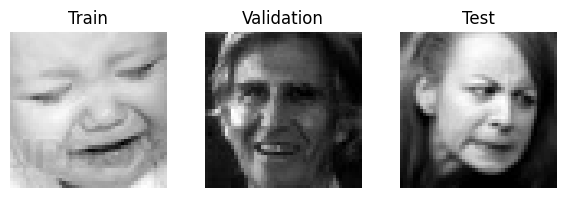

In [11]:
# Metoda koja prikazuje po 1 sliku iz train test i validation skupova
def show_first_images_in_row(train_ds, val_ds, test_ds):
    datasets = [train_ds, val_ds, test_ds]
    names = ["Train", "Validation", "Test"]
    images_to_show = []

    # uzmi prvu sliku iz svakog skupa
    for dataset, name in zip(datasets, names):
        for images, labels in dataset.take(1):
            image = images[0].numpy().squeeze()  # prva slika
            min_val = tf.reduce_min(images).numpy()
            max_val = tf.reduce_max(images).numpy()
            print(f"{name} set - Min pixel: {min_val}, Max pixel: {max_val}")
            images_to_show.append((image, name))

    # prikaz slika u jednom redu
    fig, axes = plt.subplots(1, len(images_to_show), figsize=(len(images_to_show)*2, 2))
    for ax, (image, name) in zip(axes, images_to_show):
        ax.imshow(image, cmap='gray')
        ax.set_title(name)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

show_first_images_in_row(train_ds, val_ds, test_ds)

Augmentacija train seta:

In [13]:
# Data augmentation - pozvati u modelu
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1)
    # layers.RandomZoom(0.2)
])

<h4>GRAYSLACE TO RGB:</h4>

In [294]:
def preprocess_to_rgb(img, label):
    img = tf.image.grayscale_to_rgb(img)  # 1 kanal -> 3 kanala
    return img, label

train_ds_rgb = train_ds.map(preprocess_to_rgb)
val_ds_rgb = val_ds.map(preprocess_to_rgb)
test_ds_rgb = test_ds.map(preprocess_to_rgb)

for x, y in train_ds_rgb.take(1):
    print(x.shape)  # (batch_size, img_height, img_width, 3)


(128, 48, 48, 3)


<h3 style="color: #ab5bb0">Prikaz prvih slika po kategorijama iz prvog batch-a: (random) - normalizovane, konv. u rgb</h3>

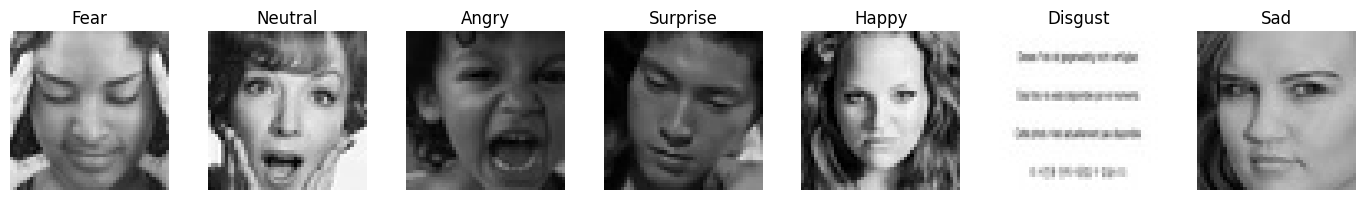

In [295]:
show_first_images_by_category_rgb(train_ds_rgb)

In [296]:
import matplotlib.pyplot as plt
import numpy as np

# Metoda koja prikazuje sliku u realnoj velicini (za poredjenje prilikom resize-a)
def show_first_image_real_size(dataset, dpi=100):
    # 1. batch
    for images, labels in dataset.take(1):
        images = images.numpy()
        labels = labels.numpy()
        break
    
    # 1. slika
    image = images[0]
    
    h, w = image.shape[:2]

    fig_width = w / dpi
    fig_height = h / dpi

    fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=dpi)
    ax.imshow(image)
    ax.axis("off")
    ax.set_aspect("equal")
    ax.set_xlim([0, w])
    ax.set_ylim([h, 0])
    plt.show()


In [297]:
def resize_images(x, y, h=128, w=128):
    #x = tf.image.resize(x, [h, w], method='nearest')
    x = tf.image.resize(x, [h, w], method=tf.image.ResizeMethod.BILINEAR)

    return x, y

<h1 style="color: #16537e">VGGNET 19</h1>

In [29]:
model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_28 (InputLayer)          │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_15 (Sequential)           │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg19 (Functional)                   │ (None, 1, 1, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_665              │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,225,111 (77.15 MB)

 Trainable params: 66,823 (261.03 KB)

 Non-trainable params: 20,024,640 (76.39 MB)

 Optimizer params: 133,648 (522.07 KB)

In [274]:
model.summary()

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)          │ (None, 130, 130, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_19 (Sequential)           │ (None, 130, 130, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 2, 2, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_10          │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1039             │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,593,335 (86.19 MB)

 Trainable params: 263,431 (1.00 MB)

 Non-trainable params: 21,803,040 (83.17 MB)

 Optimizer params: 526,864 (2.01 MB)

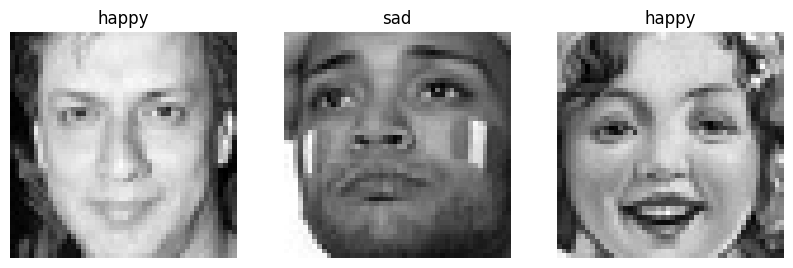

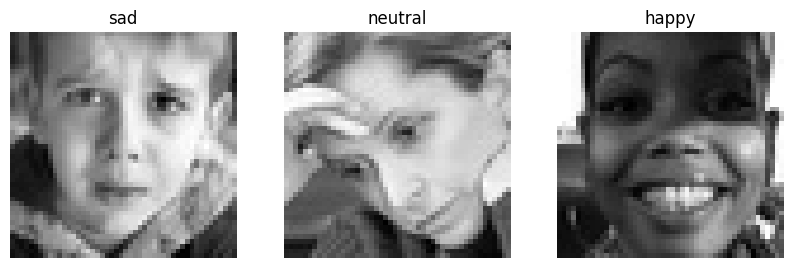

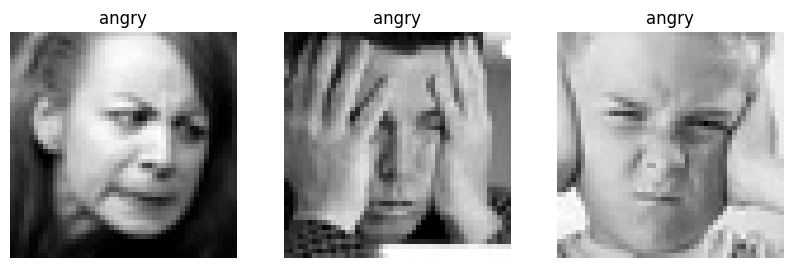

In [11]:
import matplotlib.pyplot as plt

train_class_names = train_ds.class_names
class_names = train_class_names
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):  
    for i in range(3): 
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap="gray") 
        plt.title(class_names[labels[i].numpy().argmax()])
        plt.axis("off")

class_names = val_ds.class_names
plt.figure(figsize=(10, 10))

for images, labels in val_ds.take(1):  
    for i in range(3): 
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap="gray") 
        plt.title(class_names[labels[i].numpy().argmax()])
        plt.axis("off")


class_names = test_class_names
plt.figure(figsize=(10, 10))

for images, labels in test_ds.take(1):  
    for i in range(3): 
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap="gray") 
        plt.title(class_names[labels[i].numpy().argmax()])
        plt.axis("off")

In [30]:
def count_labels_with_percentage(dataset, class_names):
    counts = dict.fromkeys(class_names, 0)
    total = 0
    
    for _, labels in dataset:
        indices = np.argmax(labels, axis=1)
        for i in indices:
            counts[class_names[i]] += 1
        total += len(indices)
    percentages = {cls: f"{(counts[cls]/total)*100:.2f}%" for cls in class_names}
    
    return counts, percentages


train_counts, train_perc = count_labels_with_percentage(train_ds, class_names)
val_counts, val_perc = count_labels_with_percentage(val_ds, class_names)
test_counts, test_perc = count_labels_with_percentage(test_ds, class_names)

print("Train dataset counts:", train_counts)
print("Train dataset %:", train_perc)

print("\nValidation dataset counts:", val_counts)
print("Validation dataset %:", val_perc)

print("\nTest dataset counts:", test_counts)
print("Test dataset %:", test_perc)


Train dataset counts: {'angry': 3194, 'disgust': 3200, 'fear': 3282, 'happy': 5731, 'neutral': 3985, 'sad': 3950, 'surprise': 2564}
Train dataset %: {'angry': '12.33%', 'disgust': '12.35%', 'fear': '12.67%', 'happy': '22.12%', 'neutral': '15.38%', 'sad': '15.25%', 'surprise': '9.90%'}

Validation dataset counts: {'angry': 799, 'disgust': 800, 'fear': 821, 'happy': 1433, 'neutral': 997, 'sad': 988, 'surprise': 641}
Validation dataset %: {'angry': '12.33%', 'disgust': '12.35%', 'fear': '12.67%', 'happy': '22.12%', 'neutral': '15.39%', 'sad': '15.25%', 'surprise': '9.89%'}

Test dataset counts: {'angry': 960, 'disgust': 111, 'fear': 1018, 'happy': 1825, 'neutral': 1216, 'sad': 1139, 'surprise': 797}
Test dataset %: {'angry': '13.59%', 'disgust': '1.57%', 'fear': '14.41%', 'happy': '25.83%', 'neutral': '17.21%', 'sad': '16.12%', 'surprise': '11.28%'}


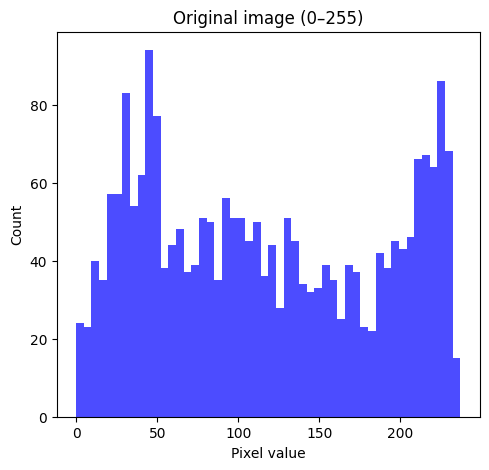

In [31]:
import matplotlib.pyplot as plt
import tensorflow as tf

images_orig, _ = next(iter(train_ds))
img_orig = images_orig[0].numpy().squeeze()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(img_orig.flatten(), bins=50, color="blue", alpha=0.7)
plt.title("Original image (0–255)")
plt.xlabel("Pixel value")
plt.ylabel("Count")


plt.show()


In [32]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

Original min: 0.0
Original max: 1.0
Original min: 0.0
Original max: 1.0
Original min: 0.0
Original max: 1.0
Mean: 0.50950694
Std: 0.24740091


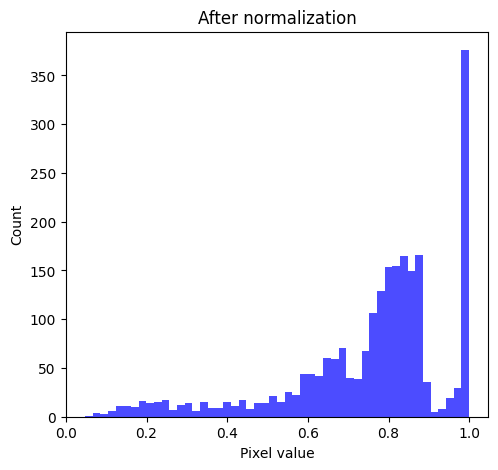

In [33]:
#Testing pixel values after normalizaton
for images, labels in train_ds.take(1):
    print("Original min:", tf.reduce_min(images).numpy())
    print("Original max:", tf.reduce_max(images).numpy())

for images, labels in val_ds.take(1):
    print("Original min:", tf.reduce_min(images).numpy())
    print("Original max:", tf.reduce_max(images).numpy())

for images, labels in test_ds.take(1):
    print("Original min:", tf.reduce_min(images).numpy())
    print("Original max:", tf.reduce_max(images).numpy())

for images, _ in train_ds.take(1):
    print("Mean:", tf.reduce_mean(images).numpy())
    print("Std:", tf.math.reduce_std(images).numpy())

import matplotlib.pyplot as plt
import tensorflow as tf

images_orig, _ = next(iter(train_ds))
img_orig = images_orig[0].numpy().squeeze()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(img_orig.flatten(), bins=50, color="blue", alpha=0.7)
plt.title("After normalization")
plt.xlabel("Pixel value")
plt.ylabel("Count")


plt.show()

<h1 style="color: #16537e">RESNET 50</h1>

<h1 style="color: #16537e">MOBILENET V2</h1>

<h1 style="color: #16537e">BASELINE CNN</h1>

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models, metrics
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import f1_score, classification_report
import numpy as np

# Parametri
img_height = 48
img_width = 48
batch_size = 128
num_classes = 7
learning_rate = 1e-4

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1)
])

# Build baseline CNN
inputs = layers.Input(shape=(img_height, img_width, 3))  
x = data_augmentation(inputs)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy', metrics.Precision(name='precision'),
             metrics.Recall(name='recall'), metrics.AUC(name='auc')]
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_baseline_cnn.keras', monitor='val_loss', save_best_only=True)

# Train
history = model.fit(
    train_ds_rgb,
    validation_data=val_ds_rgb,
    epochs=50,
    callbacks=[early_stop, model_checkpoint]
)

# Evaluate
best_model = tf.keras.models.load_model('best_baseline_cnn.keras')
eval_results = best_model.evaluate(test_ds_rgb)
print("Test results (loss, accuracy, precision, recall, AUC):", eval_results)

# F1 score i classification report
y_true = np.concatenate([y for x, y in test_ds_rgb], axis=0)
y_pred_prob = best_model.predict(test_ds_rgb)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true_classes = np.argmax(y_true, axis=1)

f1 = f1_score(y_true_classes, y_pred, average='weighted', zero_division=0)
print("F1 score:", f1)
print(classification_report(y_true_classes, y_pred, digits=4, zero_division=0))


Epoch 1/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.2306 - auc: 0.5997 - loss: 1.9112 - precision: 0.2847 - recall: 0.0017 - val_accuracy: 0.2516 - val_auc: 0.6654 - val_loss: 1.8935 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.3106 - auc: 0.6843 - loss: 1.7952 - precision: 0.5023 - recall: 0.0047 - val_accuracy: 0.3026 - val_auc: 0.7042 - val_loss: 1.8254 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.3526 - auc: 0.7255 - loss: 1.7087 - precision: 0.6667 - recall: 0.0352 - val_accuracy: 0.3584 - val_auc: 0.7444 - val_loss: 1.7083 - val_precision: 0.8235 - val_recall: 0.0024
Epoch 4/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.3743 - auc: 0.7527 - loss: 1.6406 - precision: 0.7025 - recall: 0.0762 - val_accuracy: 0.3999 - val_auc: 0.7629 - val_loss: 1.6137 - val_precision: 0.8173 - val_recall: 0.0605
Epoch 5/50
1

In [62]:
def augment(image, label):
    image = data_augmentation(image, training=True)
    return image, label

rare_class_repeat = {
    'fear': 2,
    'surprise': 2,
    'angry': 1,
    'disgust': 1
}

train_ds_balanced = train_ds.unbatch() 

for rare_class, repeat_num in rare_class_repeat.items():
    rare_idx = train_class_names.index(rare_class)
    rare_ds = train_ds_balanced.filter(lambda x, y: tf.argmax(y) == rare_idx)
    common_ds = train_ds_balanced.filter(lambda x, y: tf.argmax(y) != rare_idx)
    rare_ds_aug = rare_ds.map(augment,  num_parallel_calls=tf.data.AUTOTUNE).repeat(repeat_num)
    train_ds_balanced = common_ds.concatenate(rare_ds_aug)

train_ds_balanced = train_ds_balanced.batch(batch_size).shuffle(1000).prefetch(tf.data.AUTOTUNE)


count = sum(images.shape[0] for images, labels in train_ds_balanced)
val_count = sum(images.shape[0] for images, labels in val_ds)
test_count = sum(images.shape[0] for images, labels in test_ds)

print("Train:", count, "Validation:", val_count, "Test:", test_count)


Train: 31752 Validation: 6479 Test: 7066


In [63]:
import tensorflow as tf
from tensorflow.keras import layers, models, metrics
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import f1_score, classification_report
import numpy as np

# Parametri
img_height = 48
img_width = 48
batch_size = 128
num_classes = 7
learning_rate = 1e-4

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1)
    # layers.RandomZoom(0.1),
])

# Build baseline CNN
inputs = layers.Input(shape=(img_height, img_width, 1))  
x = data_augmentation(inputs)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
# x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1)(x)

outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy', metrics.Precision(name='precision'),
             metrics.Recall(name='recall'), metrics.AUC(name='auc')]
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_baseline_cnn.keras', monitor='val_loss', save_best_only=True)

# Train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[early_stop, model_checkpoint]
)

# Evaluate
best_model = tf.keras.models.load_model('best_baseline_cnn.keras')
eval_results = best_model.evaluate(test_ds)
print("Test results (loss, accuracy, precision, recall, AUC):", eval_results)

# F1 score i classification report
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_prob = best_model.predict(test_ds)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true_classes = np.argmax(y_true, axis=1)

f1 = f1_score(y_true_classes, y_pred, average='weighted', zero_division=0)
print("F1 score:", f1)
print(classification_report(y_true_classes, y_pred, digits=4, zero_division=0))


Epoch 1/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.1845 - auc: 0.5614 - loss: 1.9675 - precision: 0.1704 - recall: 0.0020 - val_accuracy: 0.2247 - val_auc: 0.6135 - val_loss: 1.9220 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.2488 - auc: 0.6320 - loss: 1.8643 - precision: 0.3889 - recall: 2.7021e-04 - val_accuracy: 0.2755 - val_auc: 0.6675 - val_loss: 1.8751 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.2877 - auc: 0.6676 - loss: 1.8123 - precision: 0.5330 - recall: 0.0041 - val_accuracy: 0.3164 - val_auc: 0.7010 - val_loss: 1.7632 - val_precision: 0.8889 - val_recall: 0.0012
Epoch 4/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.3257 - auc: 0.6996 - loss: 1.7524 - precision: 0.6214 - recall: 0.0226 - val_accuracy: 0.3760 - val_auc: 0.7454 - val_loss: 1.6687 - val_precision: 0.8375 - val_recall: 0.0207
Epo

Baseline RGB - everything else is exacly the same

Train sample:


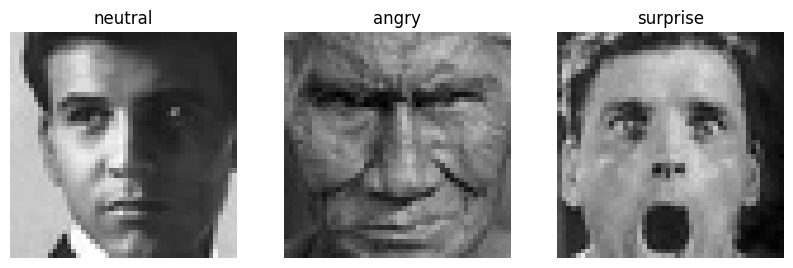

Validation sample:


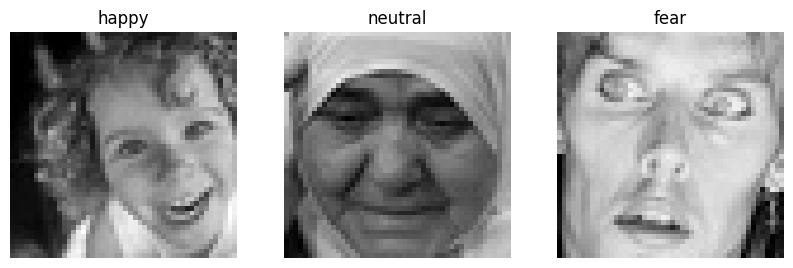

Test sample:


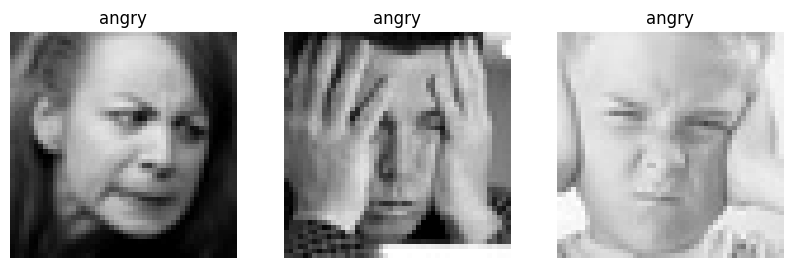

In [6]:
import tensorflow as tf

def grayscale_to_rgb(image, label):
    image = tf.image.grayscale_to_rgb(image)
    return image, label

train_ds_rgb = train_ds.map(grayscale_to_rgb)
val_ds_rgb = val_ds.map(grayscale_to_rgb)
test_ds_rgb = test_ds.map(grayscale_to_rgb)


import matplotlib.pyplot as plt

def show_images(dataset, class_names, n=3):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  
        for i in range(n):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i].numpy().argmax()])
            plt.axis("off")
    plt.show()

print("Train sample:")
show_images(train_ds_rgb, class_names)

print("Validation sample:")
show_images(val_ds_rgb, class_names)

print("Test sample:")
show_images(test_ds_rgb, class_names)


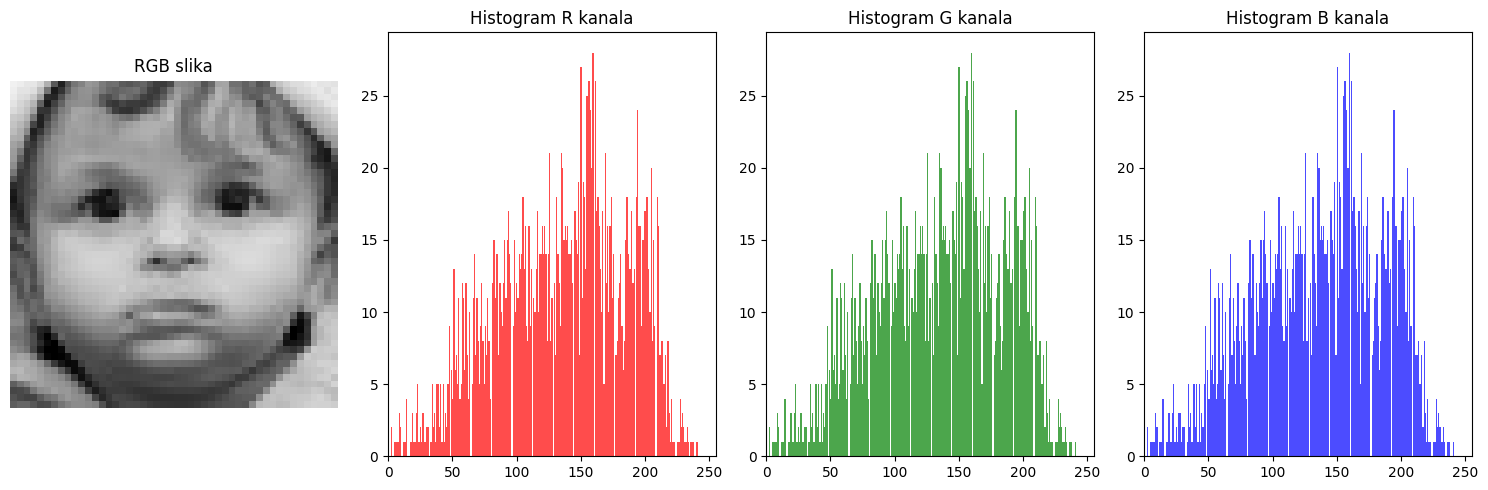

In [7]:
import matplotlib.pyplot as plt

# Uzmi jednu sliku iz train_ds_rgb
for images, labels in train_ds_rgb.take(1):
    image = images[0].numpy().astype("uint8")  # prva slika
    break

plt.figure(figsize=(15,5))

# Prikaži sliku
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title("RGB slika")
plt.axis("off")

# Histogram za svaki kanal
colors = ("r", "g", "b")
for i, col in enumerate(colors):
    plt.subplot(1, 4, i+2)
    plt.hist(image[:, :, i].ravel(), bins=256, color=col, alpha=0.7)
    plt.title(f"Histogram {col.upper()} kanala")
    plt.xlim([0, 255])

plt.tight_layout()
plt.show()


In [8]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds_rgb = train_ds_rgb.map(lambda x, y: (normalization_layer(x), y))
val_ds_rgb = val_ds_rgb.map(lambda x, y: (normalization_layer(x), y))
test_ds_rgb = test_ds_rgb.map(lambda x, y: (normalization_layer(x), y))

In [14]:
def augment(image, label):
    image = data_augmentation(image, training=True)
    return image, label


rare_class_repeat = {
    'fear': 2,
    'surprise': 2,
    'angry': 1,
    'disgust': 1
}

train_ds_balanced = train_ds.unbatch() 

for rare_class, repeat_num in rare_class_repeat.items():
    rare_idx = train_class_names.index(rare_class)
    rare_ds = train_ds_balanced.filter(lambda x, y: tf.argmax(y) == rare_idx)
    common_ds = train_ds_balanced.filter(lambda x, y: tf.argmax(y) != rare_idx)
    rare_ds_aug = rare_ds.map(augment,  num_parallel_calls=tf.data.AUTOTUNE).repeat(repeat_num)
    train_ds_balanced = common_ds.concatenate(rare_ds_aug)

train_ds_balanced = train_ds_balanced.batch(batch_size).shuffle(1000).prefetch(tf.data.AUTOTUNE)


count = sum(images.shape[0] for images, labels in train_ds_balanced)
val_count = sum(images.shape[0] for images, labels in val_ds)
test_count = sum(images.shape[0] for images, labels in test_ds)

print("Train:", count, "Validation:", val_count, "Test:", test_count)

Train: 31752 Validation: 6479 Test: 7066


In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models, metrics
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import f1_score, classification_report
import numpy as np

# Parametri
img_height = 48
img_width = 48
batch_size = 128
num_classes = 7
learning_rate = 1e-4

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1)
    # layers.RandomZoom(0.1),
])

# Build baseline CNN
inputs = layers.Input(shape=(img_height, img_width, 3))  
x = data_augmentation(inputs)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
# x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1)(x)

outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy', metrics.Precision(name='precision'),
             metrics.Recall(name='recall'), metrics.AUC(name='auc')]
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_baseline_cnn.keras', monitor='val_loss', save_best_only=True)

# Train
history = model.fit(
    train_ds_rgb,
    validation_data=val_ds_rgb,
    epochs=100,
    callbacks=[early_stop, model_checkpoint]
)

# Evaluate
best_model = tf.keras.models.load_model('best_baseline_cnn.keras')
eval_results = best_model.evaluate(test_ds_rgb)
print("Test results (loss, accuracy, precision, recall, AUC):", eval_results)

# F1 score i classification report
y_true = np.concatenate([y for x, y in test_ds_rgb], axis=0)
y_pred_prob = best_model.predict(test_ds_rgb)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true_classes = np.argmax(y_true, axis=1)

f1 = f1_score(y_true_classes, y_pred, average='weighted', zero_division=0)
print("F1 score:", f1)
print(classification_report(y_true_classes, y_pred, digits=4, zero_division=0))


Epoch 1/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.1852 - auc: 0.5524 - loss: 2.0814 - precision: 0.1715 - recall: 0.0119 - val_accuracy: 0.2269 - val_auc: 0.6075 - val_loss: 1.9133 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.2655 - auc: 0.6427 - loss: 1.8485 - precision: 0.5647 - recall: 0.0037 - val_accuracy: 0.2973 - val_auc: 0.6822 - val_loss: 1.8575 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.2999 - auc: 0.6768 - loss: 1.7926 - precision: 0.6014 - recall: 0.0167 - val_accuracy: 0.3497 - val_auc: 0.7260 - val_loss: 1.7435 - val_precision: 0.6970 - val_recall: 0.0035
Epoch 4/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.3264 - auc: 0.7036 - loss: 1.7408 - precision: 0.6430 - recall: 0.0430 - val_accuracy: 0.3590 - val_auc: 0.7424 - val_loss: 1.6617 - val_precision: 0.7672 - val_recall: 0.0671
Epoch 5

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━

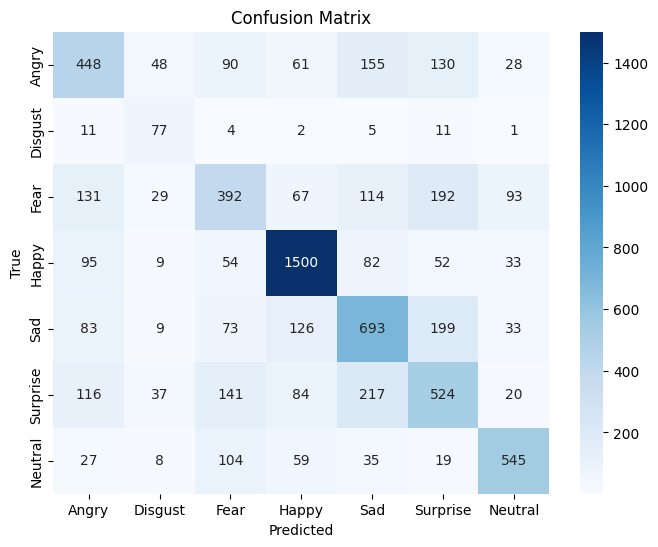

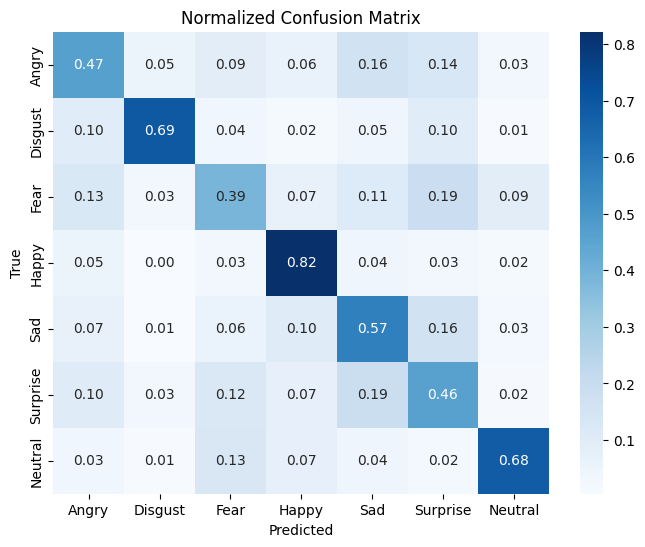

              precision    recall  f1-score   support

       Angry       0.49      0.47      0.48       960
     Disgust       0.35      0.69      0.47       111
        Fear       0.46      0.39      0.42      1018
       Happy       0.79      0.82      0.81      1825
         Sad       0.53      0.57      0.55      1216
    Surprise       0.46      0.46      0.46      1139
     Neutral       0.72      0.68      0.70       797

    accuracy                           0.59      7066
   macro avg       0.54      0.58      0.56      7066
weighted avg       0.59      0.59      0.59      7066



In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Skupljamo sve prave i predviđene vrednosti
y_true = []
y_pred = []

for images, labels in test_ds_rgb:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Konfuziona matrica
cm = confusion_matrix(y_true, y_pred)

# Ako imaš 7 emocija (npr. FER2013 dataset)
class_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Normalized Confusion Matrix")
plt.show()
_

# 3. Izveštaj (preciznost, recall, F1 po klasi)
print(classification_report(y_true, y_pred, target_names=class_names))


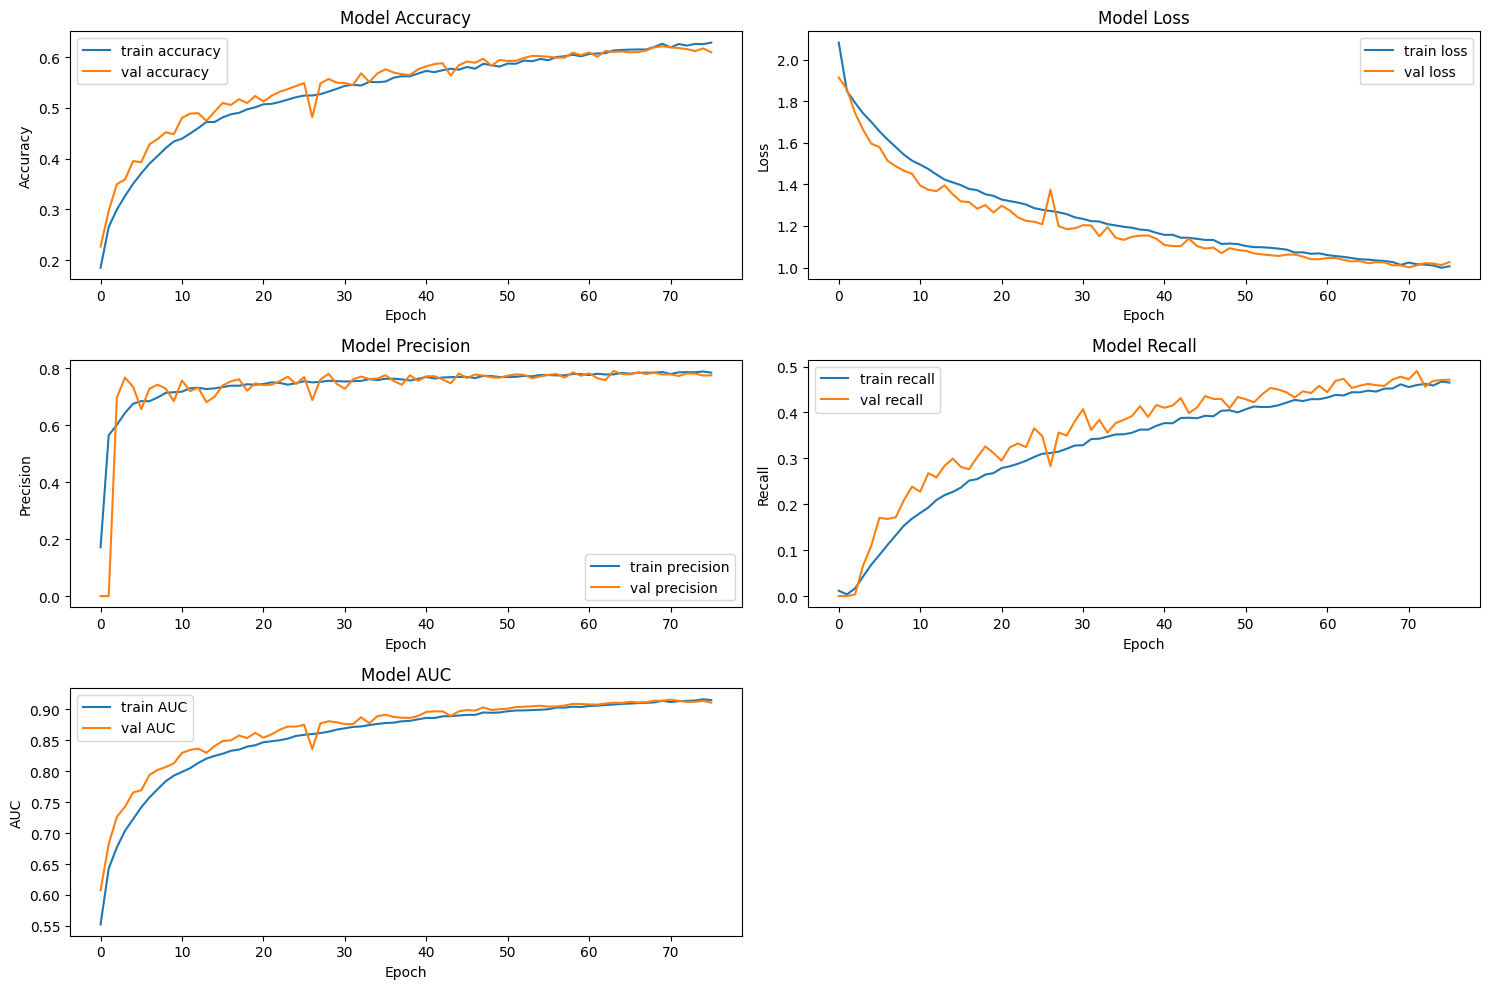

In [24]:
plt.figure(figsize=(15,10))

# Loss
plt.subplot(3,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(3,2,1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Precision
plt.subplot(3,2,3)
plt.plot(history.history['precision'], label='train precision')
plt.plot(history.history['val_precision'], label='val precision')
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

# Recall
plt.subplot(3,2,4)
plt.plot(history.history['recall'], label='train recall')
plt.plot(history.history['val_recall'], label='val recall')
plt.title('Model Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# AUC
plt.subplot(3,2,5)
plt.plot(history.history['auc'], label='train AUC')
plt.plot(history.history['val_auc'], label='val AUC')
plt.title('Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()


plt.tight_layout()
plt.show()